In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Configuración de estilo de gráficos
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Cargar el archivo parquet
file_path = 'reservas_hoteles.parquet'
df = pd.read_parquet(file_path)




In [3]:
# Filtrar el dataframe donde competencia es True
competencia_true_df = df[df['competencia'] == True]

# Calcular los id_hoteles distintos
distinct_hotels = competencia_true_df['id_hotel'].nunique()
print(f"Cantidad de id_hoteles distintos cuando competencia es True: {distinct_hotels}")

Cantidad de id_hoteles distintos cuando competencia es True: 10


In [97]:
df.columns

Index(['id_reserva', 'id_cliente', 'nombre', 'apellido', 'mail', 'competencia',
       'fecha_reserva', 'inicio_estancia', 'final_estancia', 'id_hotel',
       'precio_noche', 'nombre_hotel', 'estrellas', 'ciudad'],
      dtype='object')

In [25]:
# 1. Inspección inicial de los datos
print("Primeras filas del dataset:")
print(df.head())



Primeras filas del dataset:
                             id_reserva                            id_cliente  \
0  5256cc90-139b-43d2-8ec5-412495d751cf  346f2a77-33f4-4b2d-82f3-e8501e21b28d   
1  84fd6209-bd8d-4a92-bfe6-c68ee2c49271  346f2a77-33f4-4b2d-82f3-e8501e21b28d   
2  40c4cb55-d1f5-407b-832f-4756b8ff77b4  6ec4d7d2-e382-47cc-94f6-c647577d4035   
3  f2ce8df5-7844-43e1-8c0f-97ce7a208f21  aed17fe8-eb18-4f69-bf08-df1afdc339c3   
4  57d4515a-447d-4067-afcb-9bdcf4e4e915  710a2fbb-264f-426a-aa66-f8fffd146a2d   

      nombre   apellido                          mail  competencia  \
0  Feliciana     Cantón  feliciana.cantón@example.com         True   
1   Leonardo     Hierro   leonardo.hierro@example.com         True   
2      Maite  Calatayud   maite.calatayud@example.com        False   
3      Tecla      Bonet       tecla.bonet@example.com        False   
4    Amílcar     Andrés    amílcar.andrés@example.com        False   

  fecha_reserva inicio_estancia final_estancia  id_hotel  precio

In [26]:
print("\nInformación general del dataset:")
print(df.info())




Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_reserva       15098 non-null  object 
 1   id_cliente       15098 non-null  object 
 2   nombre           15098 non-null  object 
 3   apellido         15098 non-null  object 
 4   mail             15098 non-null  object 
 5   competencia      15098 non-null  bool   
 6   fecha_reserva    15098 non-null  object 
 7   inicio_estancia  15023 non-null  object 
 8   final_estancia   15023 non-null  object 
 9   id_hotel         15098 non-null  int64  
 10  precio_noche     9874 non-null   float64
 11  nombre_hotel     15098 non-null  object 
 12  estrellas        9926 non-null   float64
 13  ciudad           15098 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB
None


In [27]:
# Modificar el tipo de dato de las fechas

df['fecha_reserva'] = pd.to_datetime(df['fecha_reserva'], errors='coerce')
df['inicio_estancia'] = pd.to_datetime(df['inicio_estancia'], errors='coerce')
df['final_estancia'] = pd.to_datetime(df['final_estancia'], errors='coerce')

# Comprobar cambios
print(df.dtypes)

id_reserva                 object
id_cliente                 object
nombre                     object
apellido                   object
mail                       object
competencia                  bool
fecha_reserva      datetime64[ns]
inicio_estancia    datetime64[ns]
final_estancia     datetime64[ns]
id_hotel                    int64
precio_noche              float64
nombre_hotel               object
estrellas                 float64
ciudad                     object
dtype: object


In [28]:
print("\nEstadísticas descriptivas:")
#print(df.describe(include='all').T)
print(df.describe().T)




Estadísticas descriptivas:
                   count                           mean                  min  \
fecha_reserva       9926  2025-02-06 10:27:43.993552384  2025-02-01 00:00:00   
inicio_estancia    15023  2025-02-28 23:59:59.999999744  2025-03-01 00:00:00   
final_estancia     15023            2025-03-02 00:00:00  2025-03-02 00:00:00   
id_hotel         15098.0                      65.950192                  2.0   
precio_noche      9874.0                      275.11772                50.01   
estrellas         9926.0                       3.012694                  1.0   

                                 25%                  50%  \
fecha_reserva    2025-02-03 00:00:00  2025-02-06 00:00:00   
inicio_estancia  2025-03-01 00:00:00  2025-03-01 00:00:00   
final_estancia   2025-03-02 00:00:00  2025-03-02 00:00:00   
id_hotel                        27.0                 40.0   
precio_noche                  163.12              273.315   
estrellas                        2.0         

In [29]:
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
id_reserva            0
id_cliente            0
nombre                0
apellido              0
mail                  0
competencia           0
fecha_reserva      5172
inicio_estancia      75
final_estancia       75
id_hotel              0
precio_noche       5224
nombre_hotel          0
estrellas          5172
ciudad                0
dtype: int64


### Hay que treaer el precio por noche y las estrellas de algun sitio

In [30]:
# 2. Análisis de valores únicos
print("\nCantidad de valores únicos por columna:")
print(df.nunique())


Cantidad de valores únicos por columna:
id_reserva         15000
id_cliente         14847
nombre               934
apellido            1085
mail               14905
competencia            2
fecha_reserva         12
inicio_estancia        1
final_estancia         1
id_hotel              29
precio_noche        8782
nombre_hotel          20
estrellas              5
ciudad                 2
dtype: int64


### Hay algo raro en cuanto al ID del hotel y el numero de valores uncios de nombre de hotel

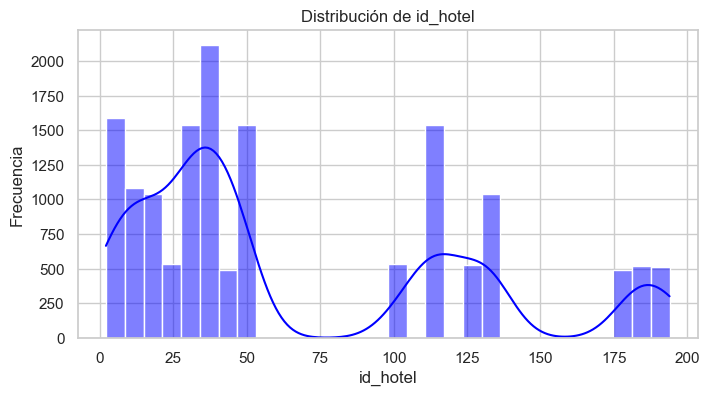

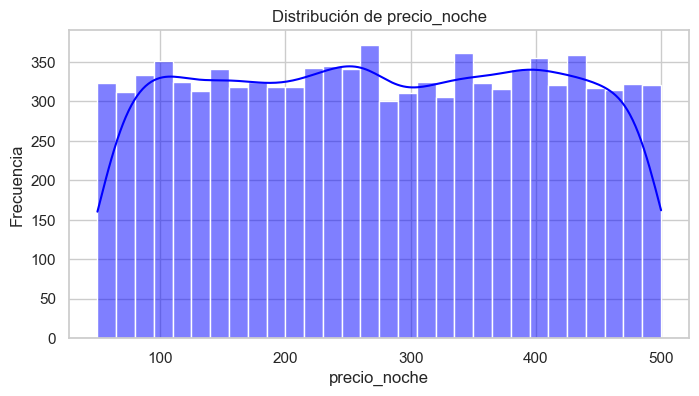

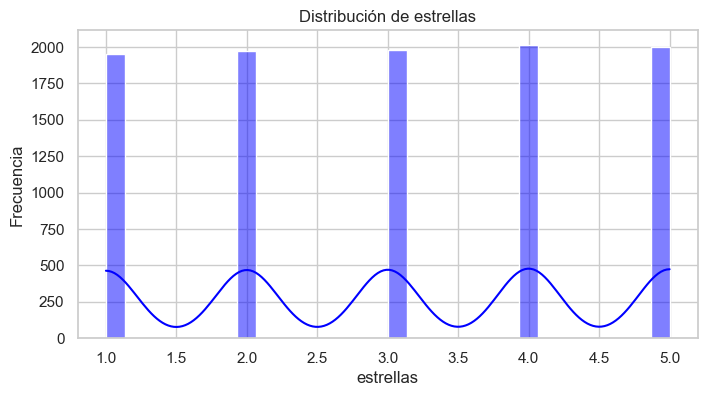

In [31]:
# 3. Visualización de la distribución de datos numéricos
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

C:\Users\44753\AppData\Local\Temp\ipykernel_12576\882829861.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


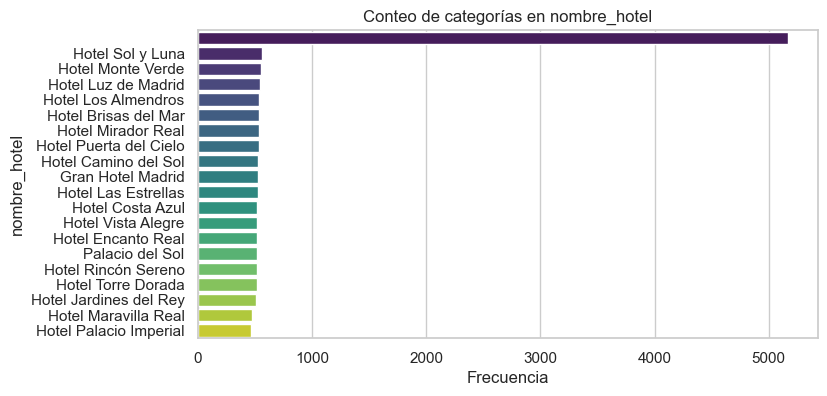

C:\Users\44753\AppData\Local\Temp\ipykernel_12576\882829861.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


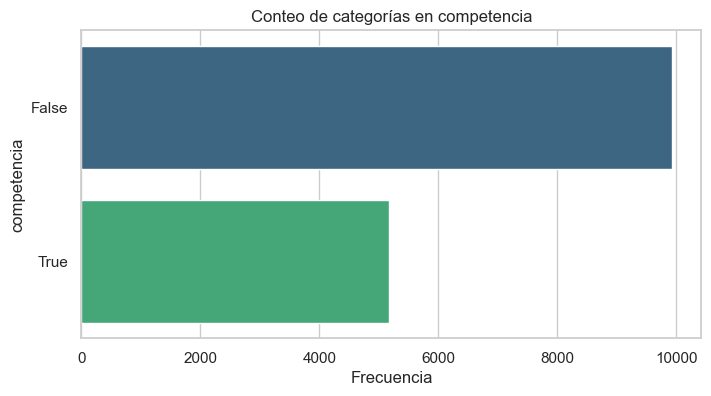

In [32]:
# 4. Análisis de valores categóricos
categorical_columns_to_analyze = ['nombre_hotel', 'competencia']

def categorical_analysis(df, list_of_categorical_columns):
    for col in list_of_categorical_columns:
        if col in df.columns:  # Ensure the column exists in the DataFrame
            plt.figure(figsize=(8, 4))
            sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
            plt.title(f'Conteo de categorías en {col}')
            plt.xlabel('Frecuencia')
            plt.ylabel(col)
            plt.show()
        else:
            print(f"Warning: The column '{col}' does not exist in the DataFrame.")

categorical_analysis(df, categorical_columns_to_analyze)

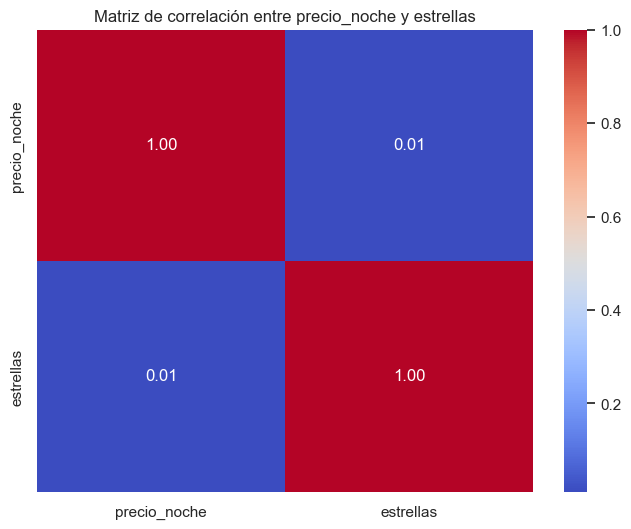

In [33]:
# 5. Correlación entre variables numéricas

columns_to_analyze = ['precio_noche', 'estrellas']

def correlation_heatmap(df, columns_to_analyze):

    subset_df = df[columns_to_analyze].dropna()  # Drop rows with missing values in these columns

    correlation_matrix = subset_df.corr()

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriz de correlación entre precio_noche y estrellas')
    plt.show()

correlation_heatmap(df, columns_to_analyze)


Visualización de valores nulos en el dataset:


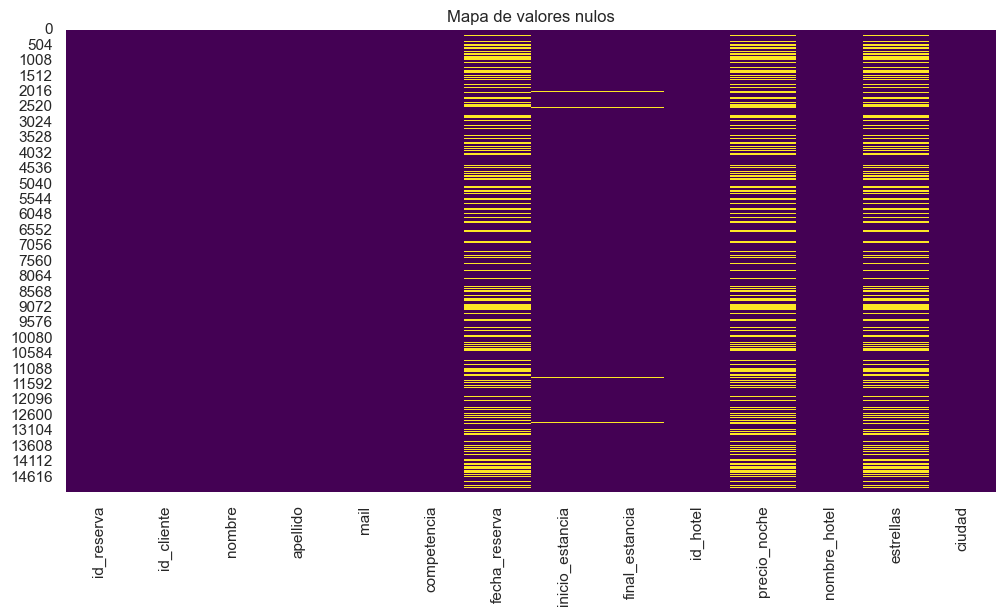

In [34]:
# 6. Análisis de valores nulos y su impacto
# https://medium.com/@brent.smart/using-heatmaps-to-visualize-missing-values-1ea429f99b5b
print("\nVisualización de valores nulos en el dataset:")
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de valores nulos')
plt.show()

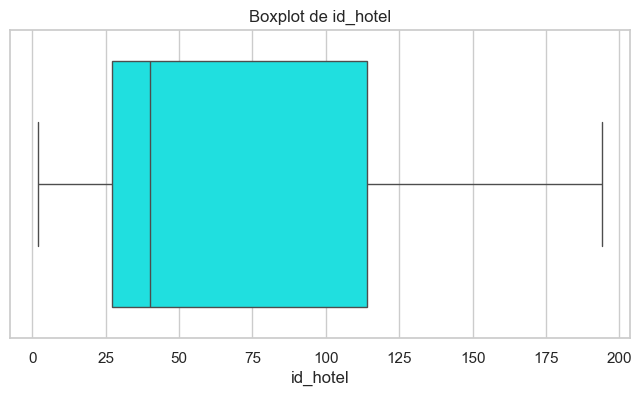

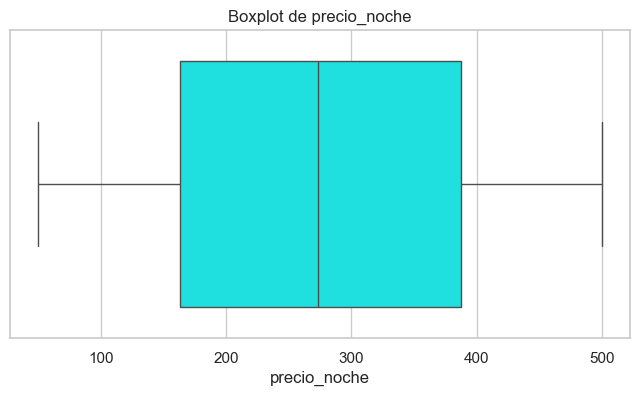

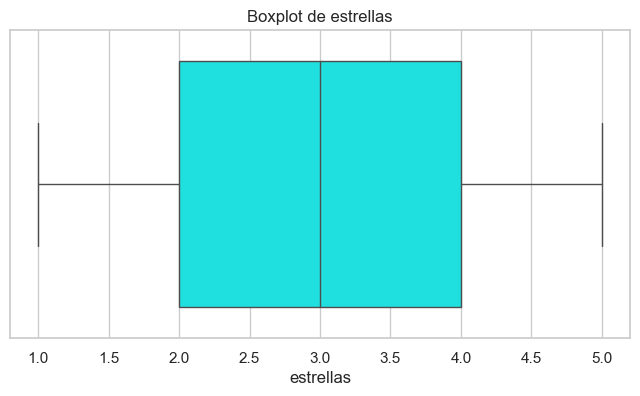

In [35]:
# 7. Análisis de outliers usando boxplots
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='cyan')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

In [36]:
competencia_df = df[df['competencia'] == False]
competencia_df['nombre_hotel'].unique()

array(['Hotel Monte Verde', 'Hotel Brisas del Mar',
       'Hotel Camino del Sol', 'Hotel Puerta del Cielo',
       'Hotel Encanto Real', 'Palacio del Sol', 'Hotel Jardines del Rey',
       'Hotel Las Estrellas', 'Gran Hotel Madrid', 'Hotel Torre Dorada',
       'Hotel Palacio Imperial', 'Hotel Luz de Madrid',
       'Hotel Los Almendros', 'Hotel Sol y Luna', 'Hotel Mirador Real',
       'Hotel Rincón Sereno', 'Hotel Vista Alegre', 'Hotel Costa Azul',
       'Hotel Maravilla Real'], dtype=object)

In [37]:
competencia_df

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid
5,ccbd9fe9-5a60-4f6f-bed3-73a7158ecba7,df42ae3d-0b9b-4c06-b22e-939323833ef8,Joan,Vazquez,joan.vazquez@example.com,False,2025-02-08,2025-03-01,2025-03-02,36,85.45,Hotel Puerta del Cielo,5.0,Madrid
6,99c3dc4f-663c-45f7-849a-ac9313f3746a,a16a9d83-6888-4947-a7ab-ed41203e347c,Chelo,Flor,chelo.flor@example.com,False,2025-02-09,2025-03-01,2025-03-02,43,309.80,Hotel Encanto Real,1.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,49c9a352-a260-46fb-9edc-a2c2d05fdfb9,cc50c0c1-a589-44b7-8a41-2c731d033f89,Victoriano,Miralles,victoriano.miralles@example.com,False,2025-02-02,2025-03-01,2025-03-02,36,367.65,Hotel Las Estrellas,3.0,Madrid
15094,f07370e3-feeb-4893-a9ff-4ec4fb518a55,2bf0215f-7f7b-4cfb-9a37-d2022c492410,Anacleto,Toledo,anacleto.toledo@example.com,False,2025-02-07,2025-03-01,2025-03-02,38,144.35,Gran Hotel Madrid,4.0,Madrid
15095,1d4b9293-1733-45ce-8a8e-79d3ac4694eb,4ba34638-c43e-455f-886d-b3e3dd223a07,Máxima,Mayoral,máxima.mayoral@example.com,False,2025-02-08,2025-03-01,2025-03-02,29,463.32,Hotel Jardines del Rey,2.0,Madrid
15096,d6823ca7-e236-48b1-bf68-6b88d9b6534a,a017cb9c-160b-4b90-b4a9-4bdb2dce546a,Rafa,Alcaraz,rafa.alcaraz@example.com,False,2025-02-10,2025-03-01,2025-03-02,15,247.63,Hotel Palacio Imperial,1.0,Madrid


In [38]:
# Crear un diccionario basado en id_hotel y nombre_hotel no nulos
hotel_name_mapping = df[df['nombre_hotel'].notnull()].set_index('id_hotel')['nombre_hotel'].to_dict()

# Actualizar los valores nulos en nombre_hotel usando el mapeo
df['nombre_hotel'] = df['nombre_hotel'].fillna(df['id_hotel'].map(hotel_name_mapping))

# Verificar el resultado
competencia_df = df[df['competencia'] == True]
competencia_df['nombre_hotel'].unique()
competencia_df

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,
7,4d65096e-5f12-4ce7-9fd6-dd20e3cf5194,443a7307-2183-4051-b0bb-26f12fc1f478,Judith,Rivas,judith.rivas@example.com,True,NaT,2025-03-01,2025-03-02,131,NaN,,NaN,
9,458029ad-cc9b-4d85-8290-fec170bcc02d,e1a34338-a0aa-4b0e-96de-55f884eeb074,Adolfo,Cuervo,adolfo.cuervo@example.com,True,NaT,2025-03-01,2025-03-02,114,NaN,,NaN,
11,ac0fe86e-90a0-4fe6-a02e-6ea00e9a8621,2949fb90-39ab-4613-b4c1-e238bb56faf3,María Carmen,Navarro,maría carmen.navarro@example.com,True,NaT,2025-03-01,2025-03-02,103,NaN,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,e856adee-838c-4031-920c-05ec5f1e32e6,7d248367-3444-4bfd-97b3-c56892fa7d97,Jesusa,Espinosa,jesusa.espinosa@example.com,True,NaT,2025-03-01,2025-03-02,135,NaN,,NaN,
14991,77134049-6e4f-49b0-a6f8-93b7466b1c22,524c7818-3167-4dc6-bbe3-a75bbc32feaf,Cruz,Hurtado,cruz.hurtado@example.com,True,NaT,2025-03-01,2025-03-02,128,NaN,,NaN,
14993,19aef6f3-3e85-4719-9dff-b768d9bfe5a9,fc8320ad-ce4d-4d23-bacd-347b2a2ac24c,Jose Francisco,Cortes,jose francisco.cortes@example.com,True,NaT,2025-03-01,2025-03-02,186,NaN,,NaN,
14996,aa092c3e-7fe6-4985-a5a8-cacd38554b1b,8469b819-d96a-4904-9cdd-710764f6301f,Toño,Narváez,toño.narváez@example.com,True,NaT,2025-03-01,2025-03-02,114,NaN,,NaN,


In [39]:
# Verificar el resultado
id_df = df[df['id_hotel'] == 135]
#competencia_df['nombre_hotel'].unique()
id_df['nombre_hotel'].unique()   

array([''], dtype=object)

### No tenemos los nombres de los hoteles

In [ ]:
dfids = df.groupby(['mail'])['mail'].count()
dfids_filtered = dfids[dfids > 1]
print(dfids_filtered)

<class 'pandas.core.series.Series'>
Index: 14905 entries, aarón.alemán@example.com to úrsula.ureña@example.com
Series name: mail
Non-Null Count  Dtype
--------------  -----
14905 non-null  int64
dtypes: int64(1)
memory usage: 232.9+ KB


In [92]:
dfids_filtered = dfids[dfids > 1]
print(dfids_filtered)


mail
abigaíl.ayala@example.com        2
adalberto.atienza@example.com    2
adelaida.moliner@example.com     2
adoración.niño@example.com       2
adoración.pol@example.com        2
                                ..
ámbar.benito@example.com         2
ángel.bermejo@example.com        2
ángeles.nuñez@example.com        2
áurea.morales@example.com        2
édgar.jordá@example.com          2
Name: mail, Length: 191, dtype: int64


In [42]:
hotel_name = df['nombre_hotel'].nunique()  # Hay 20 distintos
print(hotel_name)

ids_number = df['id_hotel'].nunique()  # Hay 29 hoteles ids distintos
print(ids_number)

ids_reserva = df['id_reserva'].nunique()  # Hay 15000 reservas ids distintos
print(ids_reserva)

ids_cliente = df['id_cliente'].nunique()  # Hay 14847 clientes ids distintos
print(ids_cliente)

emails = df['mail'].nunique()  # Hay 14905 clientes ids distintos
print(emails)



20
29
15000
14847
14905


##### Los valores para los hoteles de la competencia estan vaciones. Neceistamos scrapearlos de la web de hoteles de madrid. 
##### Tenemos 10 hoteles de la competencia. Hay que sacar los 10 primero hoteles que aparezcan y obtener el precio por noche por persona y el numero de estrelas y el nombre del hotel. 
##### El webscrapping no sale directamente, el previo de los hoteles no sale bien. 
##### Podemos usar los filtros para encontrar los hotels mas facilmente. 
##### Nombre del hotel, estrellas, precio y fecha de reserva. 

In [72]:
# Create a dictionary to map hotels to new hotel IDs
nombre_hotel_to_id = {nombre_hotel: f'hotel_{i+1:02d}' for i, nombre_hotel in enumerate(df['nombre_hotel'].unique())}

print(nombre_hotel_to_id)

# Map the emails to the new client IDs
df['id_hotel2'] = df['nombre_hotel'].map(nombre_hotel_to_id)

# Display the first few rows to verify the changes
print(df[['nombre_hotel', 'id_hotel2']].head())

{'': 'hotel_01', 'Hotel Monte Verde': 'hotel_02', 'Hotel Brisas del Mar': 'hotel_03', 'Hotel Camino del Sol': 'hotel_04', 'Hotel Puerta del Cielo': 'hotel_05', 'Hotel Encanto Real': 'hotel_06', 'Palacio del Sol': 'hotel_07', 'Hotel Jardines del Rey': 'hotel_08', 'Hotel Las Estrellas': 'hotel_09', 'Gran Hotel Madrid': 'hotel_10', 'Hotel Torre Dorada': 'hotel_11', 'Hotel Palacio Imperial': 'hotel_12', 'Hotel Luz de Madrid': 'hotel_13', 'Hotel Los Almendros': 'hotel_14', 'Hotel Sol y Luna': 'hotel_15', 'Hotel Mirador Real': 'hotel_16', 'Hotel Rincón Sereno': 'hotel_17', 'Hotel Vista Alegre': 'hotel_18', 'Hotel Costa Azul': 'hotel_19', 'Hotel Maravilla Real': 'hotel_20'}
           nombre_hotel id_hotel2
0                        hotel_01
1                        hotel_01
2     Hotel Monte Verde  hotel_02
3  Hotel Brisas del Mar  hotel_03
4  Hotel Camino del Sol  hotel_04


In [ ]:
# Create a dictionary to map emails to new client IDs
cliente_to_id = {email: f'cliente_{i+1:02d}' for i, email in enumerate(df['mail'].unique())}

# Map the emails to the new client IDs
df['id_cliente2'] = df['mail'].map(email_to_id)

# Display the first few rows to verify the changes
print(df[['mail', 'id_cliente2']].head())


                           mail id_cliente2
0  feliciana.cantón@example.com  cliente_01
1   leonardo.hierro@example.com  cliente_02
2   maite.calatayud@example.com  cliente_03
3       tecla.bonet@example.com  cliente_04
4    amílcar.andrés@example.com  cliente_05


In [ ]:
## guardame los clientes, nombre, apellido e email
df_clientes = df.drop_duplicates(['id_cliente2','nombre','apellido', 'mail'])[['id_cliente2','nombre','apellido', 'mail']]
df_clientes.head()

## comprbar dups
dfids = df_clientes.groupby(['mail'])['mail'].count()
dfids_filtered = dfids[dfids > 1]
print(dfids_filtered)

Series([], Name: mail, dtype: int64)


In [76]:
df_clientes.to_csv('clientes.csv', index=False)

In [80]:
## guardame los hoteles, nombre, y estrellas y precio
df_hoteles = df.drop_duplicates(['id_hotel2','nombre_hotel','estrellas', 'precio_noche'])[['id_hotel2','nombre_hotel','estrellas', 'precio_noche']]
df_hoteles.head()

,id_hotel2,nombre_hotel,estrellas,precio_noche
0,hotel_01,,NaN,NaN
2,hotel_02,Hotel Monte Verde,1.0,119.96
3,hotel_03,Hotel Brisas del Mar,5.0,211.53
4,hotel_04,Hotel Camino del Sol,1.0,378.37
5,hotel_05,Hotel Puerta del Cielo,5.0,85.45


In [81]:
df_hoteles.to_csv('hoteles.csv', index=False)

In [83]:
grouped = df_hoteles.groupby(['nombre_hotel', 'id_hotel2'])

average_stars = grouped.mean().round(1)

# Reset the index to have a numeric index
average_stars.reset_index(inplace=True)

average_stars.head()

average_stars.to_csv('hoteles_average_stars.csv', index=True)

In [95]:
## preparar el df de reservas
df_reservas = df.drop_duplicates(['id_reserva', 'id_cliente2', 'id_hotel2', 'inicio_estancia', 'final_estancia', 'precio_noche', 'competencia'])[['id_reserva', 'id_cliente2', 'id_hotel2', 'inicio_estancia', 'final_estancia', 'precio_noche', 'competencia']]
df_reservas.head()

df_reservas.to_csv('reservas.csv', index=False)

dfids = df_reservas.groupby(['id_reserva'])['id_reserva'].count()
dfids_filtered = dfids[dfids > 1]
print(dfids_filtered)



Series([], Name: id_reserva, dtype: int64)
